In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

In [2]:
df_raw = pd.read_csv("steam.csv")

In [3]:
df_raw.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [4]:
#Extracting unique genres
unique_genres = set(df_raw["genres"].str.split(";").explode())
print(unique_genres)

{'Strategy', 'Documentary', 'Accounting', 'Adventure', 'Video Production', 'Early Access', 'Photo Editing', 'Tutorial', 'Simulation', 'Casual', 'Game Development', 'Web Publishing', 'Gore', 'Violent', 'Sexual Content', 'Racing', 'Education', 'Utilities', 'Sports', 'Nudity', 'Design & Illustration', 'Audio Production', 'Massively Multiplayer', 'Indie', 'Animation & Modeling', 'Free to Play', 'Action', 'Software Training', 'RPG'}


In [5]:
#Extracting unique categories
unique_categories = set(df_raw["categories"].str.split(";").explode())
print(unique_categories)

{'Mods (require HL2)', 'Local Multi-Player', 'Commentary available', 'Includes level editor', 'Steam Workshop', 'Full controller support', 'SteamVR Collectibles', 'Online Co-op', 'Steam Turn Notifications', 'Steam Achievements', 'Valve Anti-Cheat enabled', 'Multi-player', 'Includes Source SDK', 'Local Co-op', 'Steam Leaderboards', 'Cross-Platform Multiplayer', 'Co-op', 'Steam Cloud', 'Shared/Split Screen', 'Online Multi-Player', 'Captions available', 'Mods', 'VR Support', 'Steam Trading Cards', 'Partial Controller Support', 'Single-player', 'MMO', 'Stats', 'In-App Purchases'}


In [6]:
#Extracting unique tags
unique_tags = set(df_raw["steamspy_tags"].str.split(";").explode())
print(unique_tags)

{'Fantasy', 'Lemmings', 'JRPG', 'Turn-Based Combat', 'Parody ', 'Political', 'Sokoban', 'Racing', 'Cold War', 'PvP', 'Local Co-Op', 'Character Action Game', 'Horror', 'Steampunk', 'Character Customization', 'Early Access', 'Sandbox', 'Hex Grid', 'Survival Horror', 'Perma Death', 'Grid-Based Movement', 'Web Publishing', 'Star Wars', 'Parkour', 'Sexual Content', 'Dungeons & Dragons', 'Software', 'Cyberpunk', "Beat 'em up", 'Programming', 'God Game', 'Movie', 'Family Friendly', 'Capitalism', 'Tactical', 'Dinosaurs', 'Dark', 'Nonlinear', 'Illuminati', 'Multiplayer', 'RTS', 'MOBA', 'Abstract', 'Time Attack', 'Touch-Friendly', 'Bullet Time', 'Moddable', 'Music-Based Procedural Generation', 'Lara Croft', 'Lovecraftian', 'Cycling', 'Masterpiece', 'Puzzle-Platformer', 'Tennis', 'Crafting', '1980s', 'Futuristic', 'Crime', 'Warhammer 40K', 'Cult Classic', 'GameMaker', 'Procedural Generation', 'Soccer', 'Education', 'Snow', 'Design & Illustration', 'NSFW', 'Competitive', 'Experimental', 'Medieval'

In [7]:
#Count of unique tags
count_unique_steamspy_tags = df_raw["steamspy_tags"].str.split(";").explode().nunique()
print(count_unique_steamspy_tags)

339


In [8]:
#Extracting unique platforms
unique_platforms = set(df_raw["platforms"].str.split(";").explode())
print(unique_platforms)

{'mac', 'windows', 'linux'}


In [9]:
#Count of unique developers
count_unique_developers = df_raw["developer"].str.split(";").explode().nunique()
print(count_unique_developers)

17953


In [10]:
#Count of unique publishers
count_unique_publishers = df_raw["publisher"].str.split(";").explode().nunique()
print(count_unique_publishers)

14352


In [11]:
#Extracting unique owners
unique_owners = df_raw["owners"].unique()
print(unique_owners)

['10000000-20000000' '5000000-10000000' '2000000-5000000'
 '20000000-50000000' '100000000-200000000' '50000000-100000000'
 '20000-50000' '500000-1000000' '100000-200000' '50000-100000'
 '1000000-2000000' '200000-500000' '0-20000']


In [12]:
#Checking for null values
df_raw.isnull()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27071,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27072,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27073,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
steam = df_raw.drop(columns=["appid","name","developer","publisher","steamspy_tags"])

In [14]:
steam

,release_date,english,platforms,required_age,categories,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,2000-11-01,1,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,124534,3339,17612,317,10000000-20000000,7.19
1,1999-04-01,1,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,3318,633,277,62,5000000-10000000,3.99
2,2003-05-01,1,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,0,3416,398,187,34,5000000-10000000,3.99
3,2001-06-01,1,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,1273,267,258,184,5000000-10000000,3.99
4,1999-11-01,1,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,2019-04-24,1,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,7,3,0,0,0,0-20000,2.09
27071,2019-04-23,1,windows,0,Single-player,Action;Adventure;Indie,0,8,1,0,0,0-20000,1.69
27072,2019-04-24,1,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,24,0,1,0,0,0-20000,3.99
27073,2019-04-17,1,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,0,2,0,0,0,0-20000,5.19


In [15]:
#Extracting year of each game's release
steam['release_date'] = pd.to_datetime(steam['release_date'])

In [16]:
steam["year"] = steam["release_date"].dt.year

In [17]:
steam["ratings_ratio"] = steam["positive_ratings"]/(steam["positive_ratings"] + steam["negative_ratings"])

In [18]:
steam

,release_date,english,platforms,required_age,categories,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,year,ratings_ratio
0,2000-11-01,1,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,124534,3339,17612,317,10000000-20000000,7.19,2000,0.973888
1,1999-04-01,1,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,3318,633,277,62,5000000-10000000,3.99,1999,0.839787
2,2003-05-01,1,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,0,3416,398,187,34,5000000-10000000,3.99,2003,0.895648
3,2001-06-01,1,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,1273,267,258,184,5000000-10000000,3.99,2001,0.826623
4,1999-11-01,1,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,0,5250,288,624,415,5000000-10000000,3.99,1999,0.947996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,2019-04-24,1,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,7,3,0,0,0,0-20000,2.09,2019,1.000000
27071,2019-04-23,1,windows,0,Single-player,Action;Adventure;Indie,0,8,1,0,0,0-20000,1.69,2019,0.888889
27072,2019-04-24,1,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,24,0,1,0,0,0-20000,3.99,2019,0.000000
27073,2019-04-17,1,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,0,2,0,0,0,0-20000,5.19,2019,1.000000


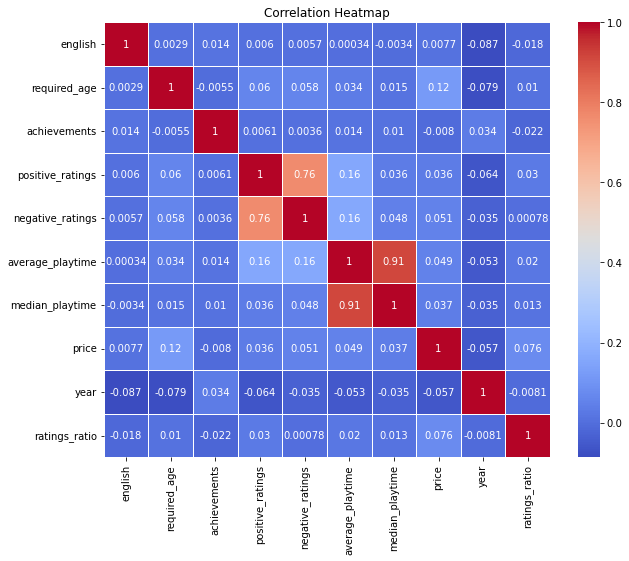

In [19]:
# Calculate the correlation matrix
correlation_matrix = steam.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Converting the categorical variables to dummy variables for regression

In [20]:
steam = steam.drop(columns=["release_date","median_playtime", "positive_ratings","negative_ratings"])

In [21]:
steam

,english,platforms,required_age,categories,genres,achievements,average_playtime,owners,price,year,ratings_ratio
0,1,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,17612,10000000-20000000,7.19,2000,0.973888
1,1,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,277,5000000-10000000,3.99,1999,0.839787
2,1,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,0,187,5000000-10000000,3.99,2003,0.895648
3,1,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,258,5000000-10000000,3.99,2001,0.826623
4,1,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,0,624,5000000-10000000,3.99,1999,0.947996
...,...,...,...,...,...,...,...,...,...,...,...
27070,1,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,7,0,0-20000,2.09,2019,1.000000
27071,1,windows,0,Single-player,Action;Adventure;Indie,0,0,0-20000,1.69,2019,0.888889
27072,1,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,24,0,0-20000,3.99,2019,0.000000
27073,1,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,0,0,0-20000,5.19,2019,1.000000


In [22]:
# Removing "Free to Play" tags from games that have nonzero price tags
steam.loc[(steam["price"] > 0) & (steam["genres"].str.contains("Free to Play")), "genres"] = steam["genres"].str.replace(r";?Free to Play", "", regex=True)

In [23]:
steam = pd.concat([steam, steam['platforms'].str.get_dummies(sep=';').add_prefix('platform_')], axis = 1).drop('platforms', 1)
steam = pd.concat([steam, steam['genres'].str.get_dummies(sep=';').add_prefix('genre_')], axis = 1).drop('genres', 1)
steam = pd.concat([steam, steam['categories'].str.get_dummies(sep=';').add_prefix('category_')], axis = 1).drop('categories', 1)
steam = pd.concat([steam, steam['owners'].str.get_dummies(sep=';').add_prefix('owners_')], axis = 1).drop('owners', 1)

/var/folders/1q/5nxmsjf15c38dnzs7xl1zq200000gn/T/ipykernel_8012/4180363288.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  steam = pd.concat([steam, steam['platforms'].str.get_dummies(sep=';').add_prefix('platform_')], axis = 1).drop('platforms', 1)
/var/folders/1q/5nxmsjf15c38dnzs7xl1zq200000gn/T/ipykernel_8012/4180363288.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  steam = pd.concat([steam, steam['genres'].str.get_dummies(sep=';').add_prefix('genre_')], axis = 1).drop('genres', 1)
/var/folders/1q/5nxmsjf15c38dnzs7xl1zq200000gn/T/ipykernel_8012/4180363288.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  steam = pd.concat([steam, steam['categories'].str.get_dummies(sep=';').add_prefix('category_')], axis = 1).dro

In [24]:
steam = steam.dropna()

In [25]:
steam.head(5)

,english,required_age,achievements,average_playtime,price,year,ratings_ratio,platform_linux,platform_mac,platform_windows,...,owners_10000000-20000000,owners_100000000-200000000,owners_20000-50000,owners_200000-500000,owners_2000000-5000000,owners_20000000-50000000,owners_50000-100000,owners_500000-1000000,owners_5000000-10000000,owners_50000000-100000000
0,1,0,0,17612,7.19,2000,0.973888,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,277,3.99,1999,0.839787,1,1,1,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,187,3.99,2003,0.895648,1,1,1,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,258,3.99,2001,0.826623,1,1,1,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,624,3.99,1999,0.947996,1,1,1,...,0,0,0,0,0,0,0,0,1,0


In [26]:
X = steam.drop(columns=["average_playtime"])
y = steam["average_playtime"]

In [27]:
#Standarizing numerical variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Building Regression Models

In [39]:
ridge_reg = Ridge(alpha=100)  
ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

In [30]:
# Decision Tree Regression
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
tree_pred = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_pred)
tree_rmse = np.sqrt(tree_mse)
tree_mae = mean_absolute_error(y_test, tree_pred)
tree_r2 = r2_score(y_test, tree_pred)

In [31]:
# Random Forest Regression
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
forest_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_pred)
forest_rmse = np.sqrt(forest_mse)
forest_mae = mean_absolute_error(y_test, forest_pred)
forest_r2 = r2_score(y_test, forest_pred)

In [32]:
print("Metrics for Ridge Regression Model:")
print("Mean Squared Error:", ridge_mse)
print("Root Mean Squared Error:", ridge_rmse)
print("Mean Absolute Error:", ridge_mae)
print("R-squared:", ridge_r2)
print("---------------------------------------------------")
print("Metrics for Decision Tree Regression Model:")
print("Mean Squared Error:", tree_mse)
print("Root Mean Squared Error:", tree_rmse)
print("Mean Absolute Error:", tree_mae)
print("R-squared:", tree_r2)
print("---------------------------------------------------")
print("Metrics for Random Forest Regression Model:")
print("Mean Squared Error:", forest_mse)
print("Root Mean Squared Error:", forest_rmse)
print("Mean Absolute Error:", forest_mae)
print("R-squared:", forest_r2)
print("---------------------------------------------------")

Metrics for Ridge Regression Model:
Mean Squared Error: 10229278.998062266
Root Mean Squared Error: 3198.324404756695
Mean Absolute Error: 274.39839144061443
R-squared: 0.019010637795847884
---------------------------------------------------
Metrics for Decision Tree Regression Model:
Mean Squared Error: 14821056.638781164
Root Mean Squared Error: 3849.8125459275498
Mean Absolute Error: 302.66869806094184
R-squared: -0.4213415141012118
---------------------------------------------------
Metrics for Random Forest Regression Model:
Mean Squared Error: 10257024.509095624
Root Mean Squared Error: 3202.658974835695
Mean Absolute Error: 259.10741643582645
R-squared: 0.01634983920214461
---------------------------------------------------


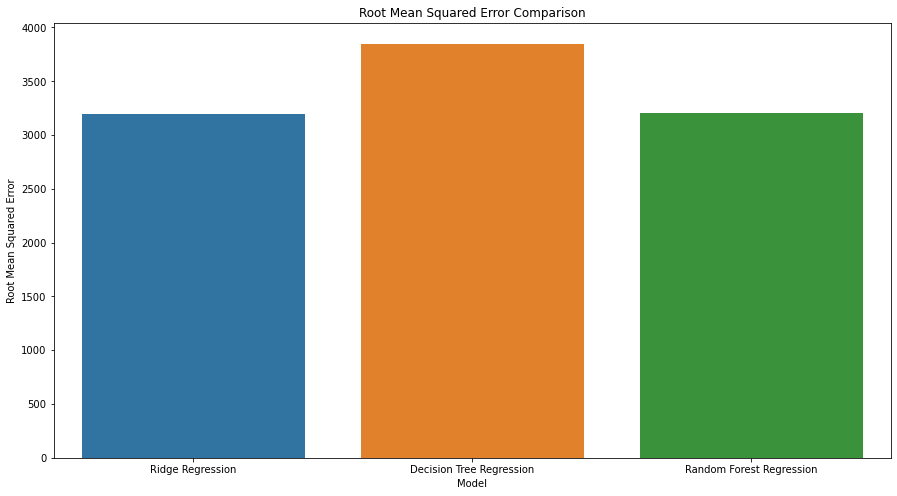

In [33]:
# Create a DataFrame for visualization
rmse_data = {
    "Model": ["Ridge Regression","Decision Tree Regression", "Random Forest Regression"],
    "RMSE": [ridge_rmse, tree_rmse, forest_rmse]
}
rmse_df = pd.DataFrame(rmse_data)

# Create a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x="Model", y="RMSE", data=rmse_df)
plt.title("Root Mean Squared Error Comparison")
plt.ylabel("Root Mean Squared Error")
plt.savefig("RMSE.png")
plt.show()

### Feature importance

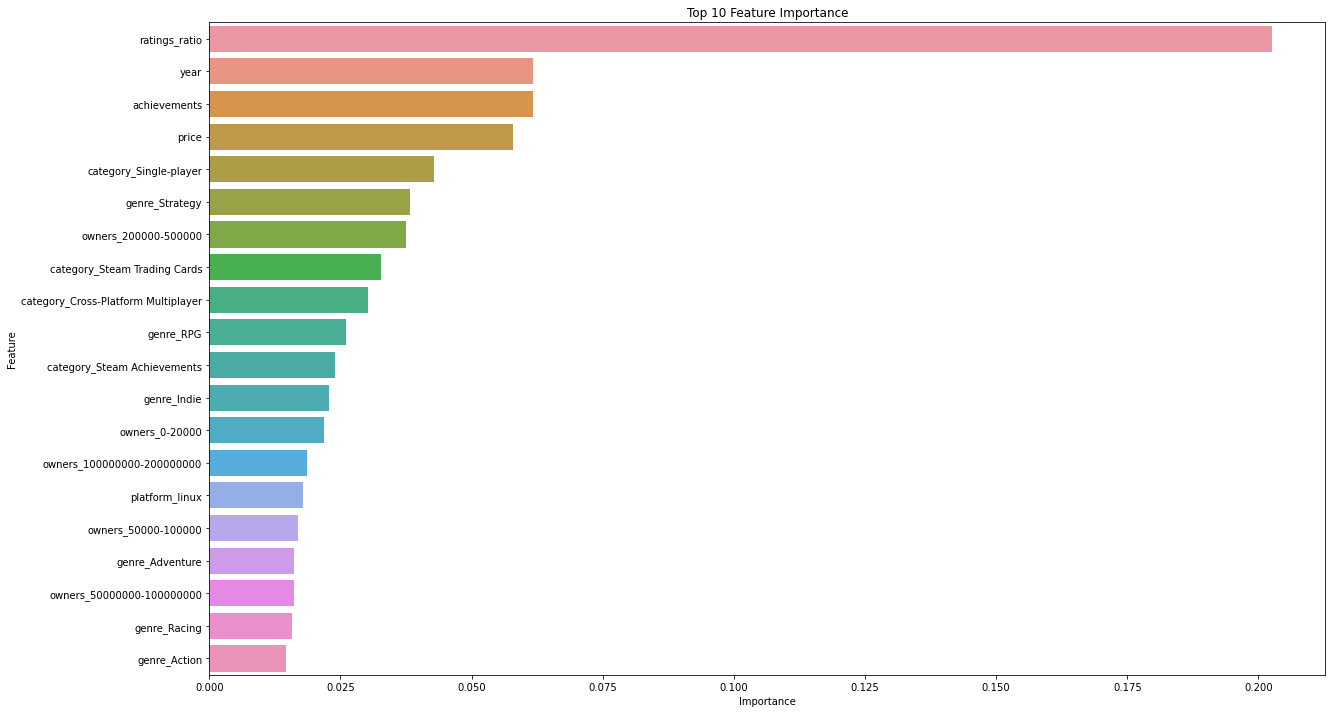

In [34]:
feature_importances = forest_reg.feature_importances_ 
feature_names = X.columns

# Creating a DataFrame for feature importances
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})

# Sorting by importance and get the top 20 features
top_features = importance_df.nlargest(20, "Importance")

# Visualize the top 20 feature importances
plt.figure(figsize=(20, 12))
sns.barplot(x="Importance", y="Feature", data=top_features)
plt.title("Top 10 Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.savefig("FeatureImportance.png")
plt.show()

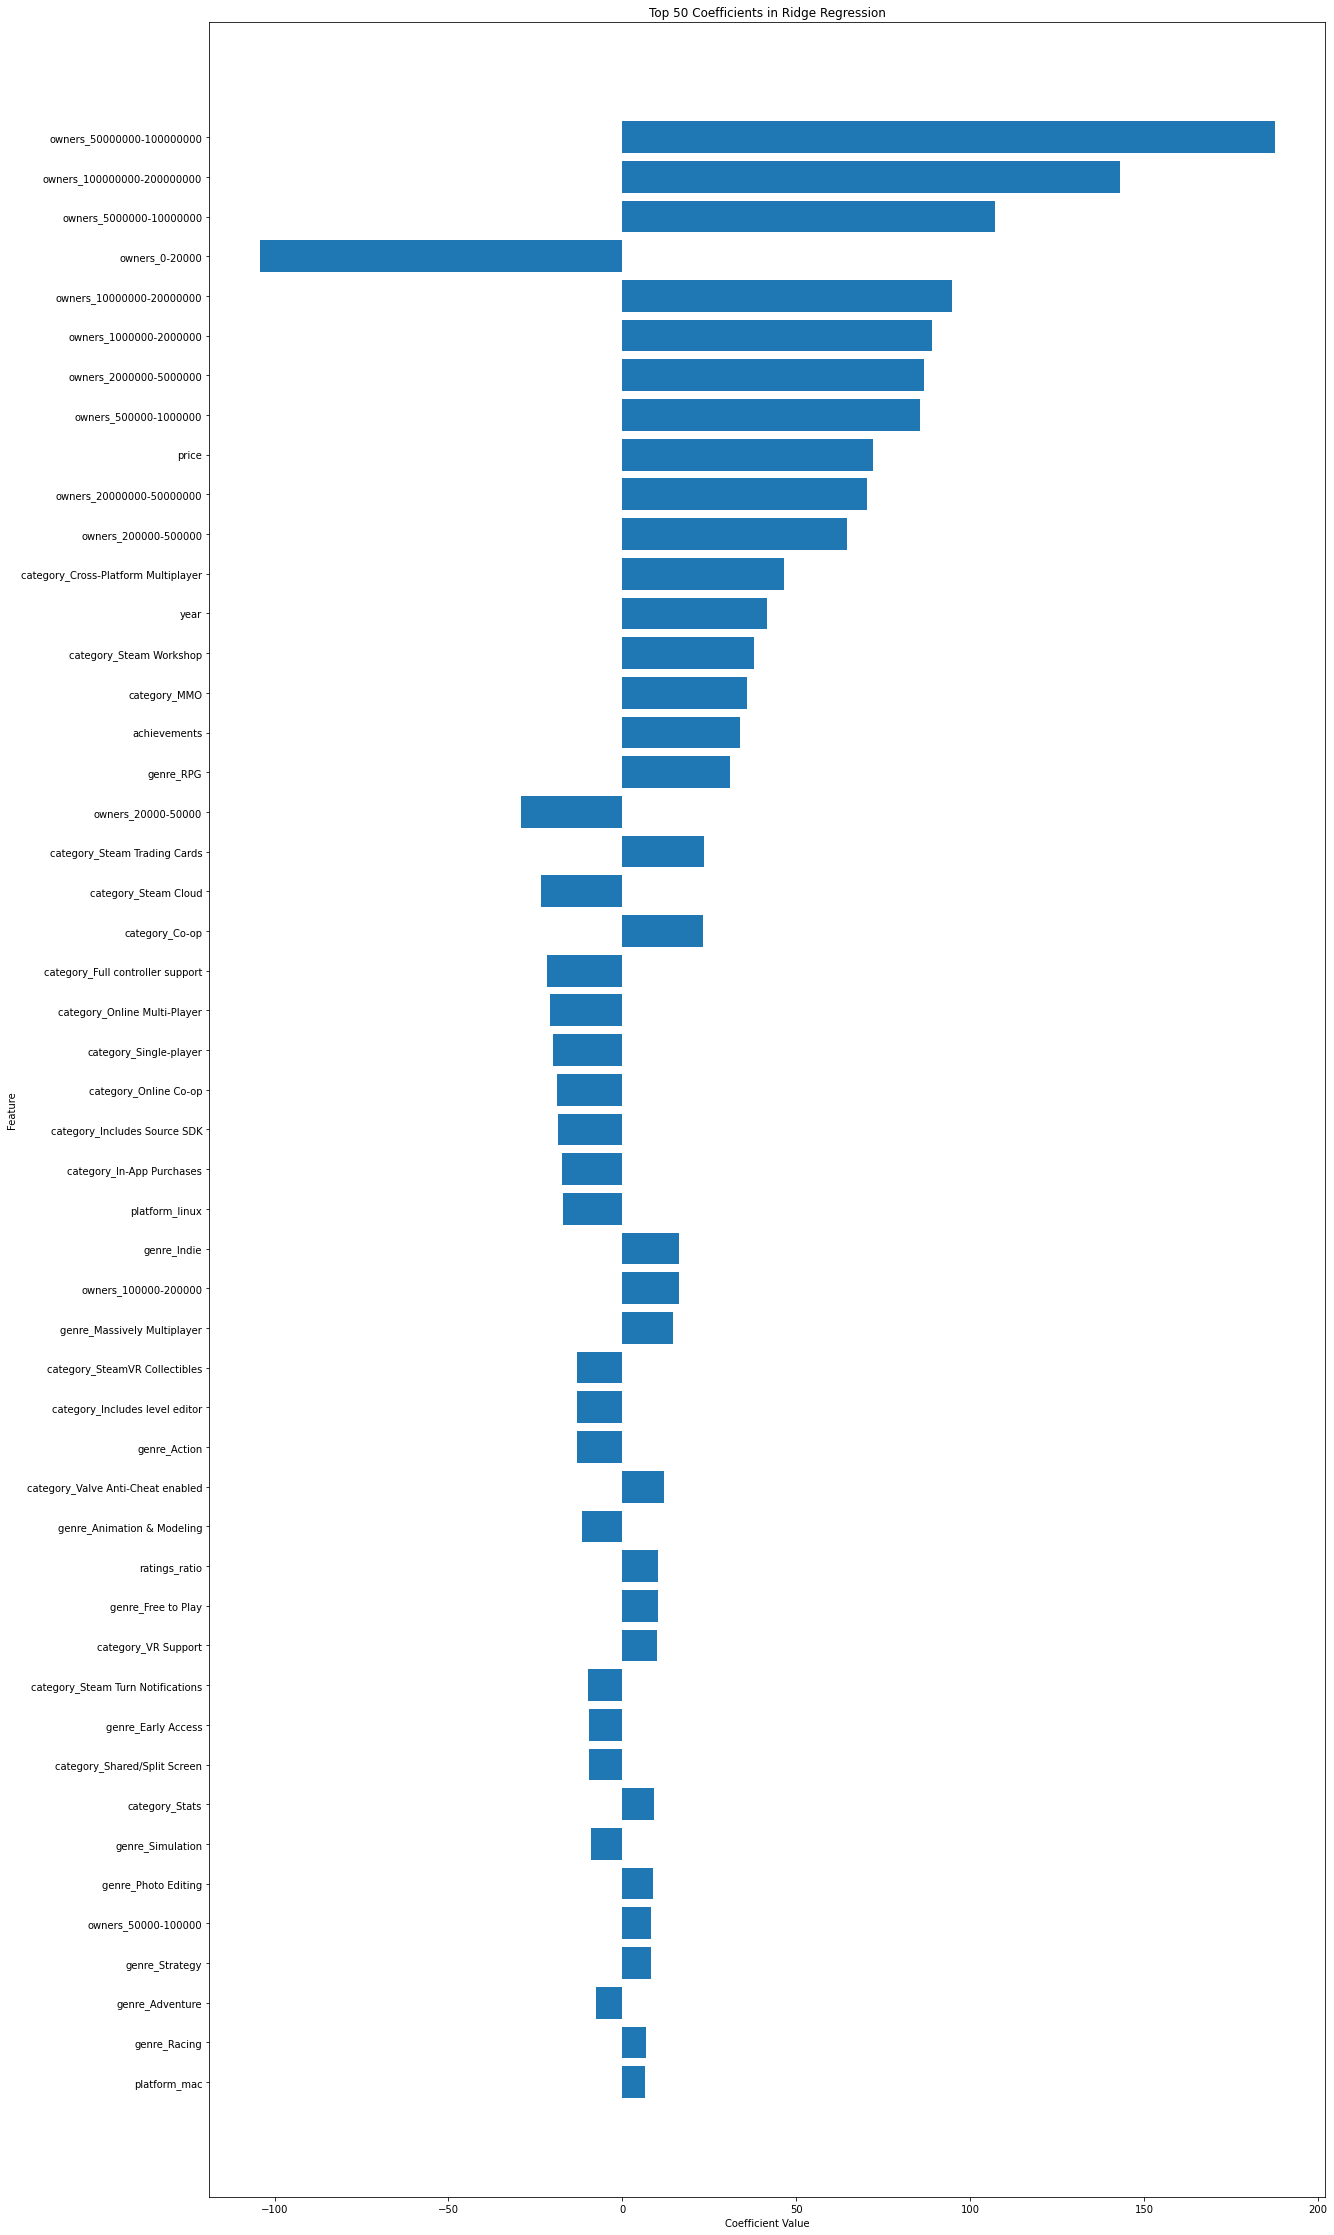

In [47]:
#Ridge Regression

coefficients = ridge_reg.coef_

# Create a DataFrame to show feature names and their corresponding coefficients
import pandas as pd
feature_importance_ridge = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values and get the top 20 coefficients
top_50_features = feature_importance_ridge.iloc[abs(feature_importance_ridge['Coefficient']).argsort()[-50:][::-1]]

# Plot the top 20 coefficients
plt.figure(figsize=(20, 40))
plt.barh(top_50_features['Feature'], top_50_features['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 50 Coefficients in Ridge Regression')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest coefficient at the top
plt.show()

### 10-fold Cross-validation

In [36]:
#ridge Regression
ridge_reg = Ridge(alpha=100)
ridge_scores = cross_val_score(ridge_reg, X_scaled, y, scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-ridge_scores)
print("ridge Regression Cross-Validation RMSE:", ridge_rmse_scores)

# Decision Tree Regression with Cross-Validation
tree_reg = DecisionTreeRegressor(random_state=42)
tree_scores = cross_val_score(tree_reg, X_scaled, y, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
print("Decision Tree Regression Cross-Validation RMSE:", tree_rmse_scores)

# Random Forest Regression with Cross-Validation
forest_reg = RandomForestRegressor(random_state=42)
forest_scores = cross_val_score(forest_reg, X_scaled, y, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print("Random Forest Regression Cross-Validation RMSE:", forest_rmse_scores)

ridge Regression Cross-Validation RMSE: [2512.91942759 1894.26499975 1974.58471844 3972.89755496  872.43981514
  933.38442711  573.71772931  227.01374687  873.08315778  218.13846163]
Decision Tree Regression Cross-Validation RMSE: [3598.80711691 3586.91053696 2393.44771425 5035.46694151 1526.71325295
 1068.14960285 1298.23946459 1457.98670324 1506.55030702  122.79830051]
Random Forest Regression Cross-Validation RMSE: [3155.68541738 1887.10733087 2085.50919634 4024.67266256 1068.8634732
 1100.54210977 1018.57855058  597.60890915  905.11678489  257.48811296]


In [37]:
#Cross-validation metrics
cv_rmse_ridge = np.mean(ridge_rmse_scores)
cv_rmse_tree = np.mean(tree_rmse_scores)
cv_rmse_forest = np.mean(forest_rmse_scores)
print("10-fold cross validation metric for ridge Regression:", cv_rmse_ridge)
print("10-fold cross validation metric for Decision Tree Regression:", cv_rmse_tree)
print("10-fold cross validation metric for Random Forest Regression:", cv_rmse_forest)

10-fold cross validation metric for ridge Regression: 1405.244403857909
10-fold cross validation metric for Decision Tree Regression: 2159.5069940782473
10-fold cross validation metric for Random Forest Regression: 1610.1172547692738
